K means for both clustering and segmentation

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.cluster import KMeans
from skimage.segmentation import slic,mark_boundaries
from skimage.io import imshow,imread


In [2]:
image1 = Image.open("/content/im1.bmp")
image2 = Image.open("/content/im2.bmp")

# Convert the images to numpy arrays
data1 = np.array(image1)
data2 = np.array(image2)

# Reshape the data to have each pixel as a data point
reshaped_data1 = data1.reshape(-1, 3)  # For RGB images, assuming 3 color channels
reshaped_data2 = data2.reshape(-1, 3)

# Concatenate the two images' data
concatenated_data = np.concatenate((reshaped_data1, reshaped_data2))

# Perform K-means clustering
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(concatenated_data)

# Obtain the labels assigned to each data point
labels = kmeans.labels_

# Separate the labels for each image
labels_image1 = labels[:reshaped_data1.shape[0]]
labels_image2 = labels[reshaped_data1.shape[0]:]

# Reshape the labels back to the original image shape
labels_image1 = labels_image1.reshape(data1.shape[:2])
labels_image2 = labels_image2.reshape(data2.shape[:2])

# Perform change detection by comparing the labels
change_map = (labels_image1 != labels_image2).astype(np.uint8) * 255

# Save the change map
change_map_image = Image.fromarray(change_map, mode='L')
change_map_image.save("change_map.png")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


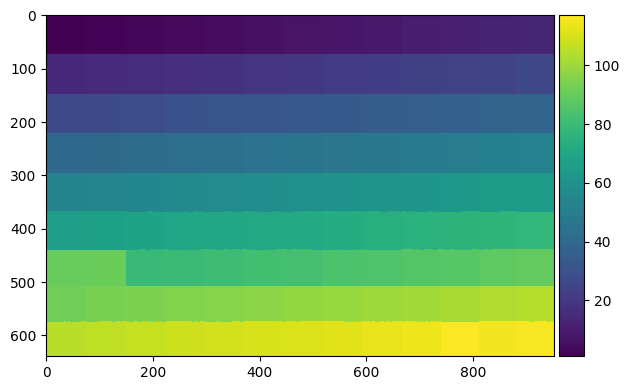

In [3]:
image = imread('/content/change_map.png')
segmented_image = slic(image, n_segments=110, compactness=20)

# Display the segmented image
imshow(segmented_image)


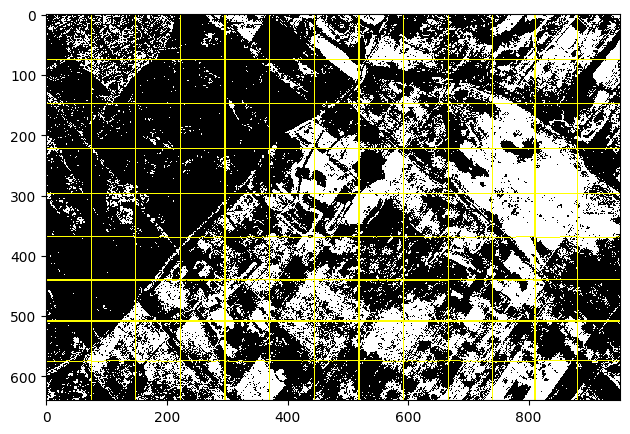

In [4]:
reconstructed = mark_boundaries(image, segmented_image)

# Display the reconstructed image
imshow(reconstructed)

In [ ]:
from skimage import feature

In [ ]:


# Assuming you have a segmented image called 'segmented_image'
# Convert the segmented image to grayscale if needed
gray_image = segmented_image

# Example feature extraction using Local Binary Patterns (LBP)
lbp_features = feature.local_binary_pattern(gray_image, P=8, R=1, method='uniform')
lbp_histogram, _ = np.histogram(lbp_features.ravel(), bins=np.arange(0, 10), range=(0, 10))

# Example feature extraction using Histogram of Oriented Gradients (HOG)
hog_features = feature.hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))

# Example feature extraction using Haralick texture features
textures = feature.greycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
haralick_features = feature.greycoprops(textures, prop='dissimilarity')

# You can extract more features or try different methods based on your requirements



/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


In [ ]:
import matplotlib.pyplot as plt


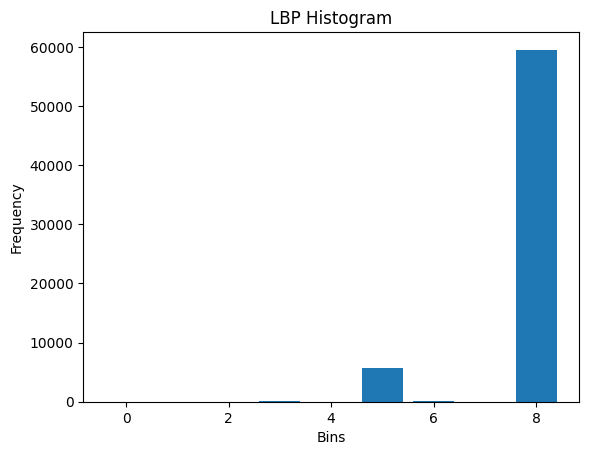

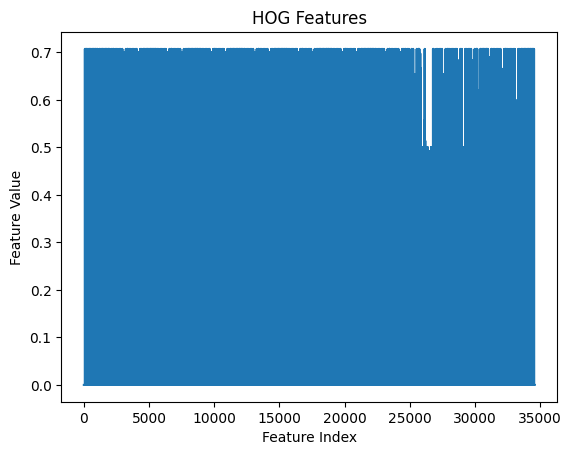

Haralick Features:
Feature 1: [0.06223958]


In [ ]:

# Assuming you have extracted features like 'lbp_histogram', 'hog_features', 'haralick_features'
# Visualize the LBP histogram
plt.figure()
plt.bar(range(len(lbp_histogram)), lbp_histogram)
plt.title("LBP Histogram")
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.show()

# Visualize the HOG features
plt.figure()
plt.plot(hog_features)
plt.title("HOG Features")
plt.xlabel("Feature Index")
plt.ylabel("Feature Value")
plt.show()

# Print the Haralick features
print("Haralick Features:")
for i, feature in enumerate(haralick_features):
    print(f"Feature {i+1}: {feature}")

# You can modify the visualization based on the type of features and your requirements


In [ ]:
import csv


In [ ]:

# Assuming you have extracted features like 'lbp_histogram', 'hog_features', 'haralick_features'

# Open a CSV file for writing
with open('extracted_features.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['LBP_{}'.format(i) for i in range(len(lbp_histogram))])
    writer.writerow(lbp_histogram)

    writer.writerow(['HOG_{}'.format(i) for i in range(len(hog_features))])
    writer.writerow(hog_features)

    writer.writerow(['Haralick_{}'.format(i+1) for i in range(len(haralick_features))])
    writer.writerow(haralick_features)

print("Features saved to extracted_features.csv")
